# Laptop Price Prediction

Importing Nececessory Libraries for importing data and data visulization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\Yash Khedekar\Data Science\Python\Python Project\Laptop\laptopPrice.csv")

### 1.Data Cleaning / EDA

In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
for col in df:
    print(col,":",df[col].unique())
    print("--------------------------------------------------------")

brand : ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
--------------------------------------------------------
processor_brand : ['Intel' 'AMD' 'M1']
--------------------------------------------------------
processor_name : ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
--------------------------------------------------------
processor_gnrtn : ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
--------------------------------------------------------
ram_gb : ['4 GB' '8 GB' '16 GB' '32 GB']
--------------------------------------------------------
ram_type : ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
--------------------------------------------------------
ssd : ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
--------------------------------------------------------
hdd : ['1024 GB' '0 GB' '512 GB' '2048 GB']
--------------------------------------------------------
os 

### Converting Object column to numeric

In [7]:
df["rating"]=df["rating"].str.replace("stars","") # replacing stars and star 
df["rating"]=df["rating"].str.replace("star","")

In [8]:
df["rating"]=df["rating"].astype("float64") # changing data type

In [9]:
df["ram_gb"]=df["ram_gb"].str.replace("GB","")
df["ssd"]=df["ssd"].str.replace("GB","")
df["hdd"]=df["hdd"].str.replace("GB","")
df["graphic_card_gb"]=df["graphic_card_gb"].str.replace("GB","")

In [10]:
df["ram_gb"]=df["ram_gb"].astype("int64")
df["ssd"]=df["ssd"].astype("int64")
df["hdd"]=df["hdd"].astype("int64")
df["graphic_card_gb"]=df["graphic_card_gb"].astype("int64")

In [11]:
# data madhe khup jast columns ahet mahnun unnecesary columns udvat ahe 
drop_cols = ['os_bit', 'Number of Reviews', 'Number of Ratings']
df.drop(columns=drop_cols, inplace=True)


In [12]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating'],
      dtype='object')

for warrnaty

In [13]:
print(df["warranty"].unique())

['No warranty' '1 year' '2 years' '3 years']


In [14]:
df["warranty"] = df["warranty"].str.strip()

In [15]:
mapping = {"No warranty": 0, "1 year": 1, "2 years": 2, "3 years": 3}
df["warranty_encoded"] = df["warranty"].map(mapping)


In [16]:
df=df.drop("warranty",axis=1)

In [17]:
print(df["warranty_encoded"])


0      0
1      0
2      0
3      0
4      0
      ..
818    1
819    1
820    1
821    1
822    0
Name: warranty_encoded, Length: 823, dtype: int64


for Touchscreen

In [18]:
print(df["Touchscreen"].unique())

['No' 'Yes']


In [19]:
df["Touchscreen"] = df["Touchscreen"].str.strip()

In [20]:
t_mapping = {"Yes": 1, "No": 0}
df["Touchscreen_encoded"] = df["Touchscreen"].map(t_mapping)


In [21]:
df["Touchscreen_encoded"].unique()

array([0, 1])

In [22]:
df=df.drop("Touchscreen",axis=1)

In [23]:
df.head(2)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,msoffice,Price,rating,warranty_encoded,Touchscreen_encoded
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,0,Casual,No,34649,2.0,0,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,0,Casual,No,38999,3.0,0,0


for msoffice

In [24]:
print(df["msoffice"].unique())

['No' 'Yes']


In [25]:
df["msoffice"] = df["msoffice"].str.strip()

In [26]:
m_mapping = {"Yes": 1, "No": 0}
df["msoffice_encoded"] = df["msoffice"].map(m_mapping)


In [27]:
df["msoffice_encoded"].unique()

array([0, 1])

In [28]:
df=df.drop("msoffice",axis=1)

In [29]:
for col in df:
    print(col,":",df[col].unique())
    print("--------------------------------------------------------")

brand : ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
--------------------------------------------------------
processor_brand : ['Intel' 'AMD' 'M1']
--------------------------------------------------------
processor_name : ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
--------------------------------------------------------
processor_gnrtn : ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
--------------------------------------------------------
ram_gb : [ 4  8 16 32]
--------------------------------------------------------
ram_type : ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
--------------------------------------------------------
ssd : [   0  512  256  128 1024 2048 3072]
--------------------------------------------------------
hdd : [1024    0  512 2048]
--------------------------------------------------------
os : ['Windows' 'DOS' 'Mac']
-------------------------------------

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                823 non-null    object 
 1   processor_brand      823 non-null    object 
 2   processor_name       823 non-null    object 
 3   processor_gnrtn      823 non-null    object 
 4   ram_gb               823 non-null    int64  
 5   ram_type             823 non-null    object 
 6   ssd                  823 non-null    int64  
 7   hdd                  823 non-null    int64  
 8   os                   823 non-null    object 
 9   graphic_card_gb      823 non-null    int64  
 10  weight               823 non-null    object 
 11  Price                823 non-null    int64  
 12  rating               823 non-null    float64
 13  warranty_encoded     823 non-null    int64  
 14  Touchscreen_encoded  823 non-null    int64  
 15  msoffice_encoded     823 non-null    int

In [31]:
df.isnull().sum()# checking null 

brand                  0
processor_brand        0
processor_name         0
processor_gnrtn        0
ram_gb                 0
ram_type               0
ssd                    0
hdd                    0
os                     0
graphic_card_gb        0
weight                 0
Price                  0
rating                 0
warranty_encoded       0
Touchscreen_encoded    0
msoffice_encoded       0
dtype: int64

In [32]:
df.duplicated() # checking duplicate Values

0      False
1      False
2      False
3      False
4      False
       ...  
818    False
819    False
820    False
821    False
822    False
Length: 823, dtype: bool

In [33]:
df.describe()

,ram_gb,ssd,hdd,graphic_card_gb,Price,rating,warranty_encoded,Touchscreen_encoded,msoffice_encoded
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,8.680437,452.121507,227.071689,1.190765,76745.177400,3.562576,0.721750,0.117861,0.341434
std,4.372408,316.662592,413.105282,2.026902,45101.790525,0.567282,0.593231,0.322640,0.474479
min,4.000000,0.000000,0.000000,0.000000,16990.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,46095.000000,3.000000,0.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,64990.000000,4.000000,1.000000,0.000000,0.000000
75%,8.000000,512.000000,0.000000,2.000000,89636.000000,4.000000,1.000000,0.000000,1.000000
max,32.000000,3072.000000,2048.000000,8.000000,441990.000000,5.000000,3.000000,1.000000,1.000000


In [34]:
df.shape

(823, 16)

checking outliers

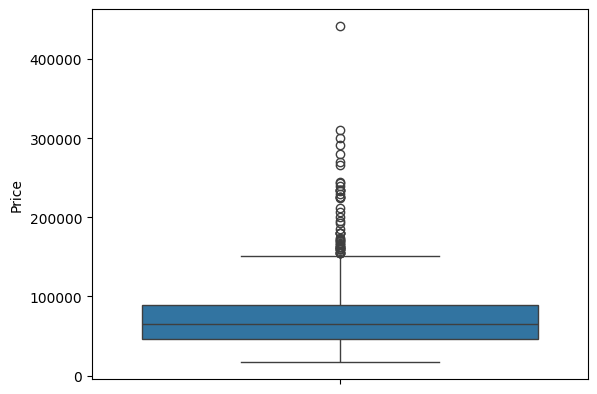

In [35]:
sns.boxplot(df["Price"])
plt.show()


Removing Outliers

In [36]:
Q3 = np.quantile(df["Price"],0.75)
Q1 = np.quantile(df["Price"],0.25)
print(f"Q3: {Q3} and Q1 : {Q1}")

IQR = Q3 - Q1 # Inter Quantile Range
print("IQR :",IQR)

Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
print("Lower Whisker :",Lower_Whisker,"and","Upper Whisker :",Upper_Whisker)

print("Rows before filtering:", df.shape[0])

df = df[(df["Price"] >= Lower_Whisker) & (df["Price"] <= Upper_Whisker)]

print("Rows after filtering:", df.shape[0])


Q3: 89636.0 and Q1 : 46095.0
IQR : 43541.0
Lower Whisker : -19216.5 and Upper Whisker : 154947.5
Rows before filtering: 823
Rows after filtering: 773


# Data Visulization

In [37]:
custom_colors = [
    "#636EFA",  
    "#EF553B",  
    "#00CC96",  
    "#AB63FA",  
    "#FFA15A",  
    "#19D3F3",  
    "#FF6692",  
    "#B6E880",  
    "#FF97FF",  
    "#FECB52",  
]
# Set the custom palette
sns.set_palette(custom_colors)
sns.set_style("darkgrid")

Brands

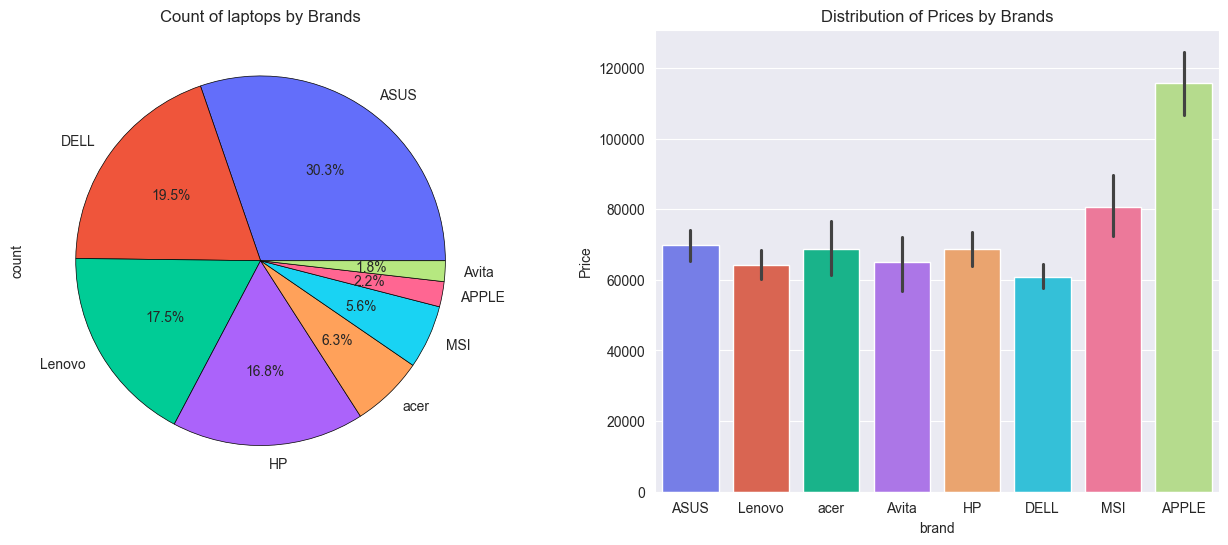

In [38]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["brand"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])
axes[0].set_title("Count of laptops by Brands")

sns.barplot(data=df,x="brand",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by Brands")
plt.show()

Processor Brands

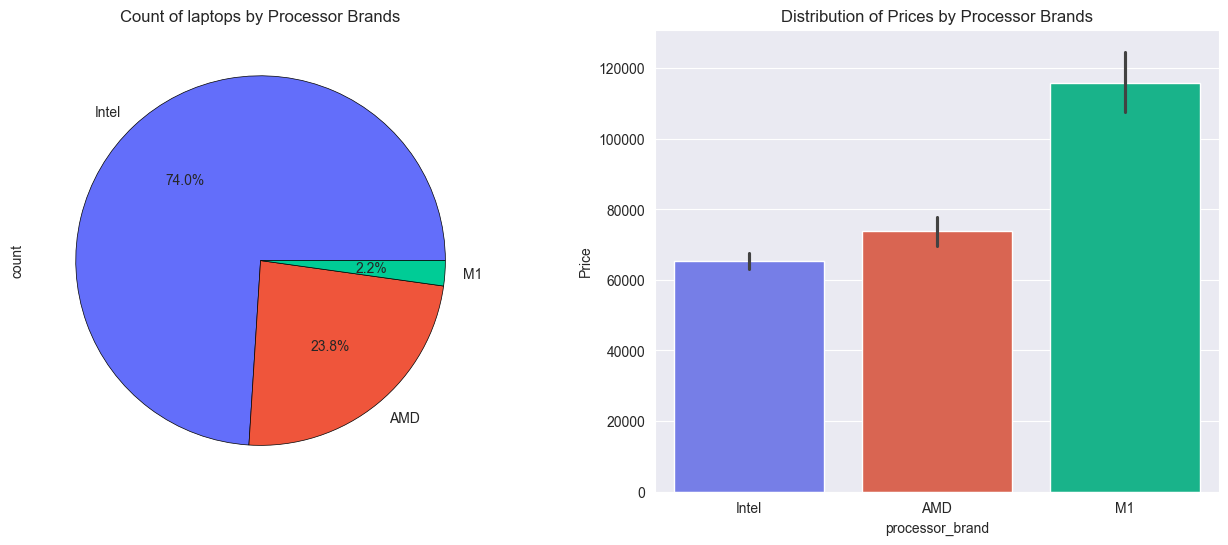

In [39]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["processor_brand"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])
axes[0].set_title("Count of laptops by Processor Brands")

sns.barplot(data=df,x="processor_brand",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by Processor Brands")
plt.show()

Processor Names

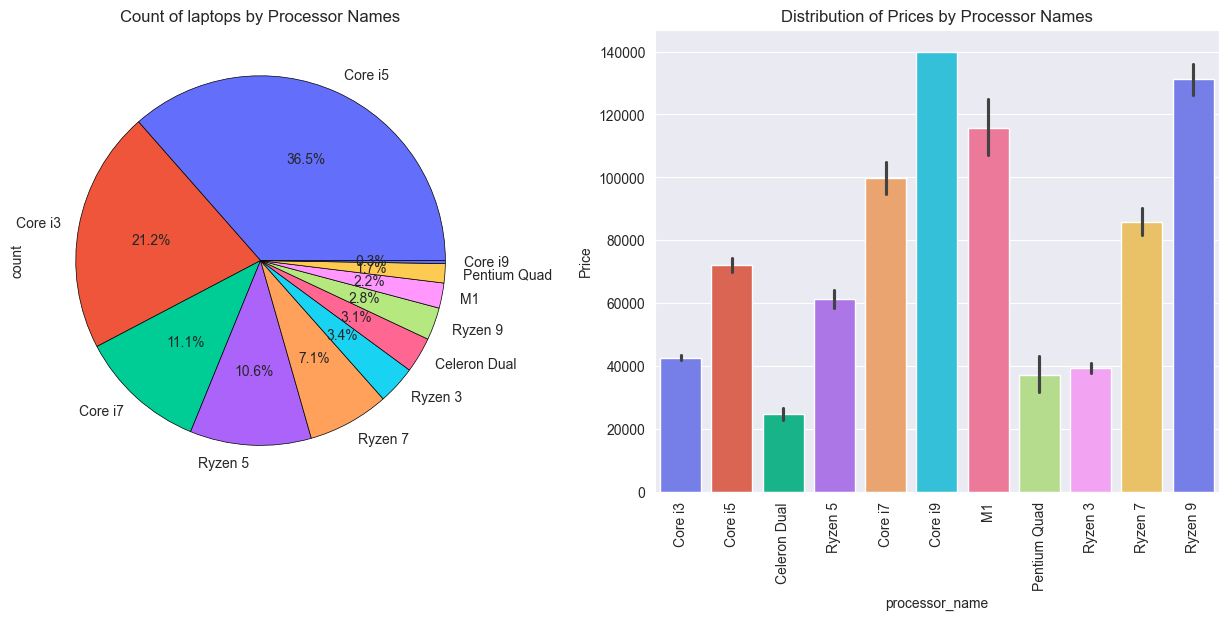

In [40]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["processor_name"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])
axes[0].set_title("Count of laptops by Processor Names")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=df,x="processor_name",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by Processor Names")
axes[1].tick_params(axis='x', rotation=90)
plt.show()

Processor Generations

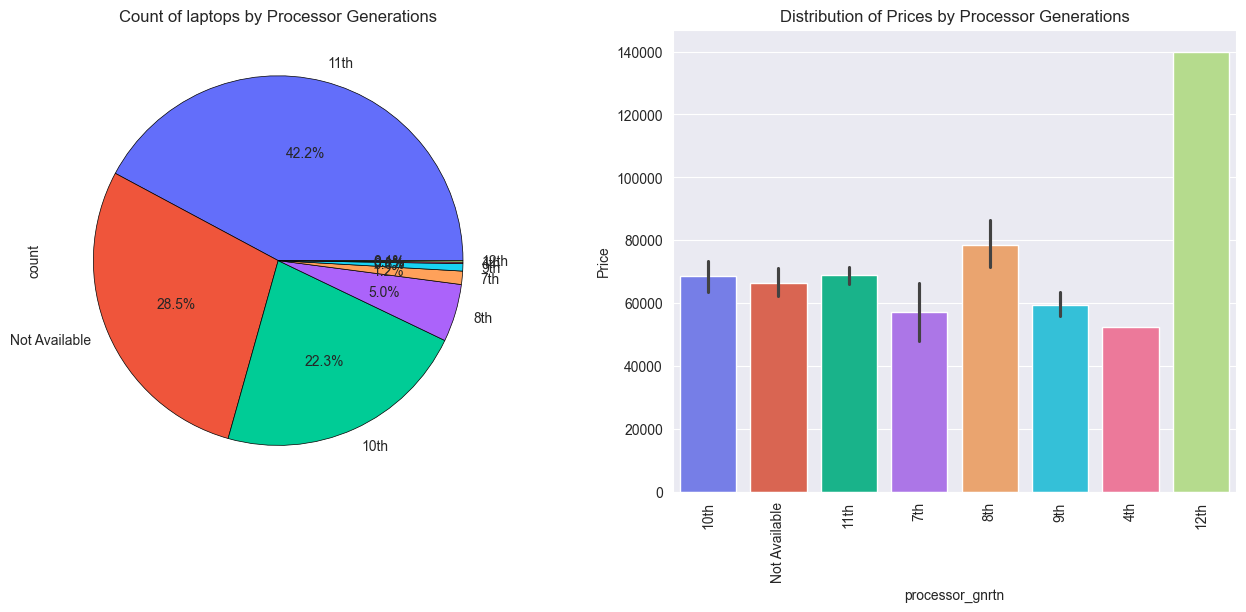

In [41]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["processor_gnrtn"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])
axes[0].set_title("Count of laptops by Processor Generations")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=df,x="processor_gnrtn",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by Processor Generations")
axes[1].tick_params(axis='x', rotation=90)
plt.show()

In [42]:
df["processor_gnrtn"].value_counts(normalize=True)*100
## More than 27% of processor generations are not available.


processor_gnrtn
11th             42.173351
Not Available    28.460543
10th             22.250970
8th               5.045278
7th               1.164295
9th               0.646831
4th               0.129366
12th              0.129366
Name: proportion, dtype: float64

Ram GB

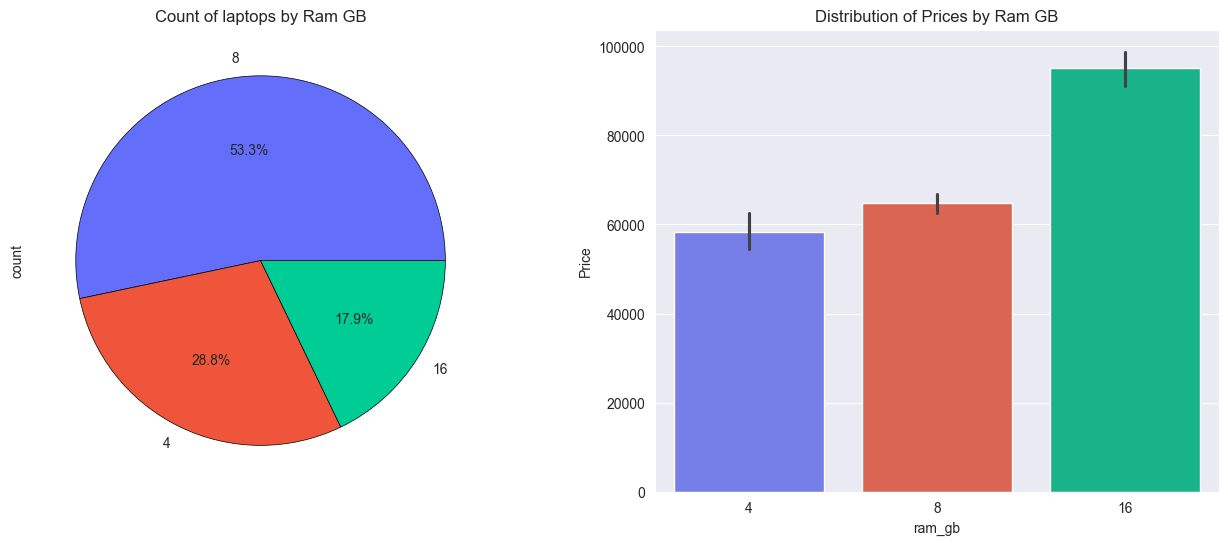

In [43]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["ram_gb"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])

axes[0].set_title("Count of laptops by Ram GB")

sns.barplot(data=df,x="ram_gb",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by Ram GB")
plt.show()

Solid State Drive (SSD)

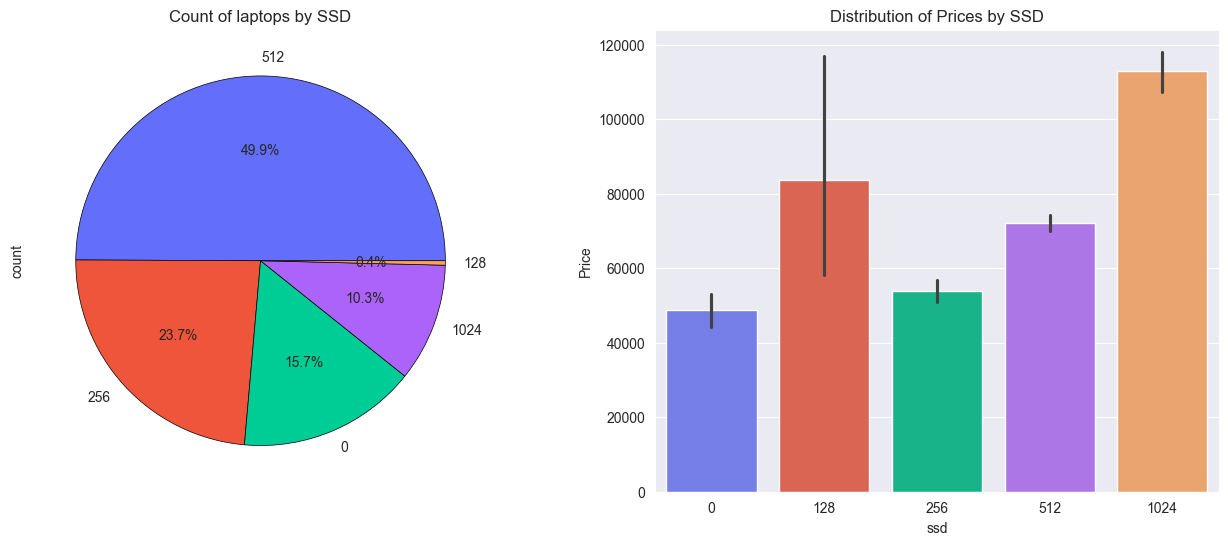

In [44]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
df["ssd"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])

axes[0].set_title("Count of laptops by SSD")

sns.barplot(data=df,x="ssd",y="Price",palette=custom_colors,ax=axes[1])
axes[1].set_title("Distribution of Prices by SSD")
plt.show()

Operating Systems

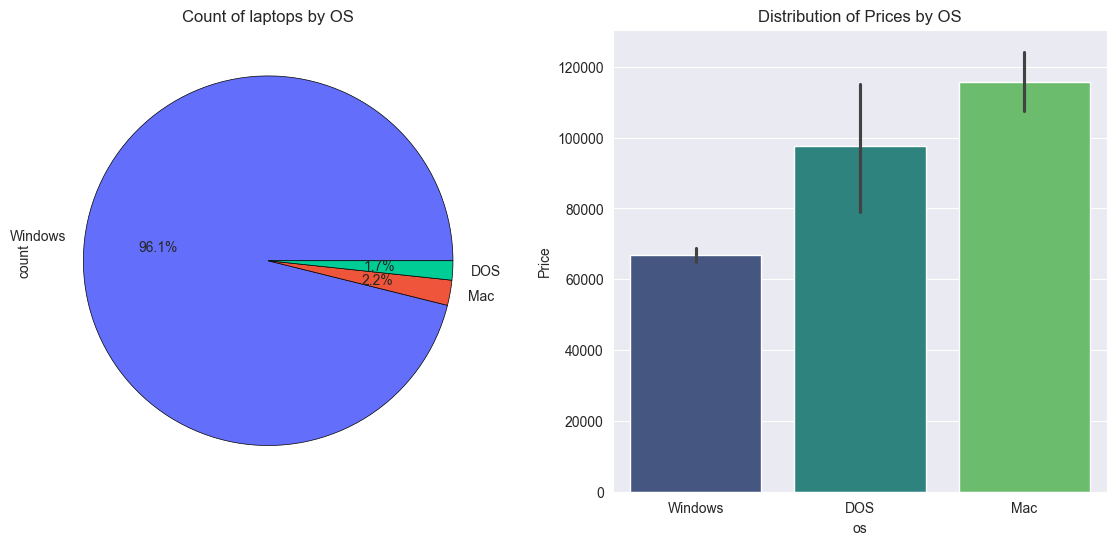

In [45]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
df["os"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])

axes[0].set_title("Count of laptops by OS")

sns.barplot(data=df,x="os",y="Price",palette="viridis",ax=axes[1])
axes[1].set_title("Distribution of Prices by OS")
plt.show()

Touchscreen

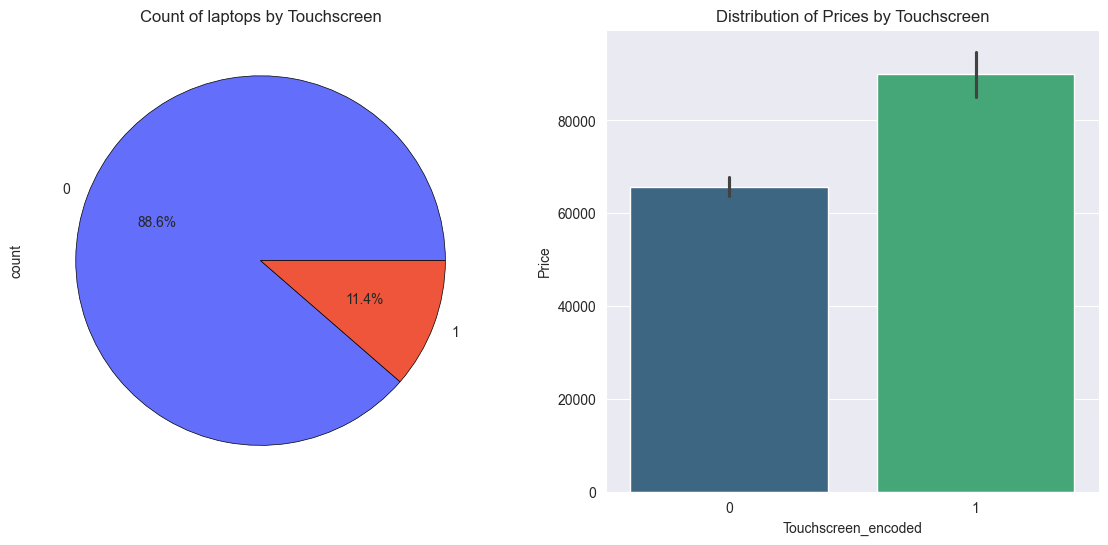

In [46]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
df["Touchscreen_encoded"].value_counts().plot(kind="pie",autopct="%.1f%%",wedgeprops={"edgecolor":"black","linewidth":0.5},ax=axes[0])

axes[0].set_title("Count of laptops by Touchscreen")

sns.barplot(data=df,x="Touchscreen_encoded",y="Price",palette="viridis",ax=axes[1])
axes[1].set_title("Distribution of Prices by Touchscreen")
plt.show()

# EDA

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
for i in df.columns:
    print(i,":",df[i].unique())
    print("-----------------------")

brand : ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
-----------------------
processor_brand : ['Intel' 'AMD' 'M1']
-----------------------
processor_name : ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
-----------------------
processor_gnrtn : ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
-----------------------
ram_gb : [ 4  8 16]
-----------------------
ram_type : ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
-----------------------
ssd : [   0  512  256  128 1024]
-----------------------
hdd : [1024    0  512 2048]
-----------------------
os : ['Windows' 'DOS' 'Mac']
-----------------------
graphic_card_gb : [0 2 4 6 8]
-----------------------
weight : ['Casual' 'ThinNlight' 'Gaming']
-----------------------
Price : [ 34649  38999  39999  69990  26990  22990  21990  58799  49999  59990
  93700  72990  17490  35990  56490  65390  31999  32490  31799  29890
  23990  32955  4620

Label Encoding

In [50]:
label_cols = ["processor_gnrtn", 'weight'] # using label encoding on ordinal data
for col in label_cols:
    lr = LabelEncoder()
    df[col] = lr.fit_transform(df[col])


In [51]:
one_hot_cols = ["brand", "processor_brand", "processor_name", "ram_type", "os"]

df = pd.get_dummies(df,columns=one_hot_cols,drop_first=True,dtype="int")  

In [52]:
print(df.dtypes)

processor_gnrtn                  int64
ram_gb                           int64
ssd                              int64
hdd                              int64
graphic_card_gb                  int64
weight                           int64
Price                            int64
rating                         float64
warranty_encoded                 int64
Touchscreen_encoded              int64
msoffice_encoded                 int64
brand_ASUS                       int64
brand_Avita                      int64
brand_DELL                       int64
brand_HP                         int64
brand_Lenovo                     int64
brand_MSI                        int64
brand_acer                       int64
processor_brand_Intel            int64
processor_brand_M1               int64
processor_name_Core i3           int64
processor_name_Core i5           int64
processor_name_Core i7           int64
processor_name_Core i9           int64
processor_name_M1                int64
processor_name_Pentium Qu

In [53]:
df.columns

Index(['processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'weight',
       'Price', 'rating', 'warranty_encoded', 'Touchscreen_encoded',
       'msoffice_encoded', 'brand_ASUS', 'brand_Avita', 'brand_DELL',
       'brand_HP', 'brand_Lenovo', 'brand_MSI', 'brand_acer',
       'processor_brand_Intel', 'processor_brand_M1', 'processor_name_Core i3',
       'processor_name_Core i5', 'processor_name_Core i7',
       'processor_name_Core i9', 'processor_name_M1',
       'processor_name_Pentium Quad', 'processor_name_Ryzen 3',
       'processor_name_Ryzen 5', 'processor_name_Ryzen 7',
       'processor_name_Ryzen 9', 'ram_type_DDR4', 'ram_type_DDR5',
       'ram_type_LPDDR3', 'ram_type_LPDDR4', 'ram_type_LPDDR4X', 'os_Mac',
       'os_Windows'],
      dtype='object')

In [54]:
df.shape[1]

37

In [55]:
from sklearn.preprocessing import StandardScaler


for i in df.columns:
    ss = StandardScaler()
    df[i]=ss.fit_transform(df[[i]])

In [56]:
df.head()

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,weight,Price,rating,warranty_encoded,Touchscreen_encoded,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows
0,-0.948381,-1.069695,-1.530595,1.868154,-0.578723,-0.769752,-1.176863,-2.775054,-1.233495,-0.358423,...,-0.344483,-0.27677,-0.171156,0.378802,-0.088446,-0.102262,-0.179005,-0.271314,-0.149956,0.20094
1,-0.948381,-1.069695,-1.530595,1.868154,-0.578723,-0.769752,-1.025129,-1.002230,-1.233495,-0.358423,...,-0.344483,-0.27677,-0.171156,0.378802,-0.088446,-0.102262,-0.179005,-0.271314,-0.149956,0.20094
2,-0.948381,-1.069695,-1.530595,1.868154,-0.578723,-0.769752,-0.990248,-1.002230,-1.233495,-0.358423,...,-0.344483,-0.27677,-0.171156,0.378802,-0.088446,-0.102262,-0.179005,-0.271314,-0.149956,0.20094
3,-0.948381,-0.068637,0.323146,-0.565010,0.509727,-0.769752,0.055878,-1.002230,-1.233495,-0.358423,...,-0.344483,-0.27677,-0.171156,0.378802,-0.088446,-0.102262,-0.179005,-0.271314,-0.149956,0.20094
4,1.458603,-1.069695,-1.530595,0.651572,-0.578723,-0.769752,-1.444019,-1.002230,-1.233495,-0.358423,...,-0.344483,-0.27677,-0.171156,0.378802,-0.088446,-0.102262,-0.179005,-0.271314,-0.149956,0.20094


# Machine LEarning

In [57]:
x = df.drop("Price",axis=1)
y = df["Price"]

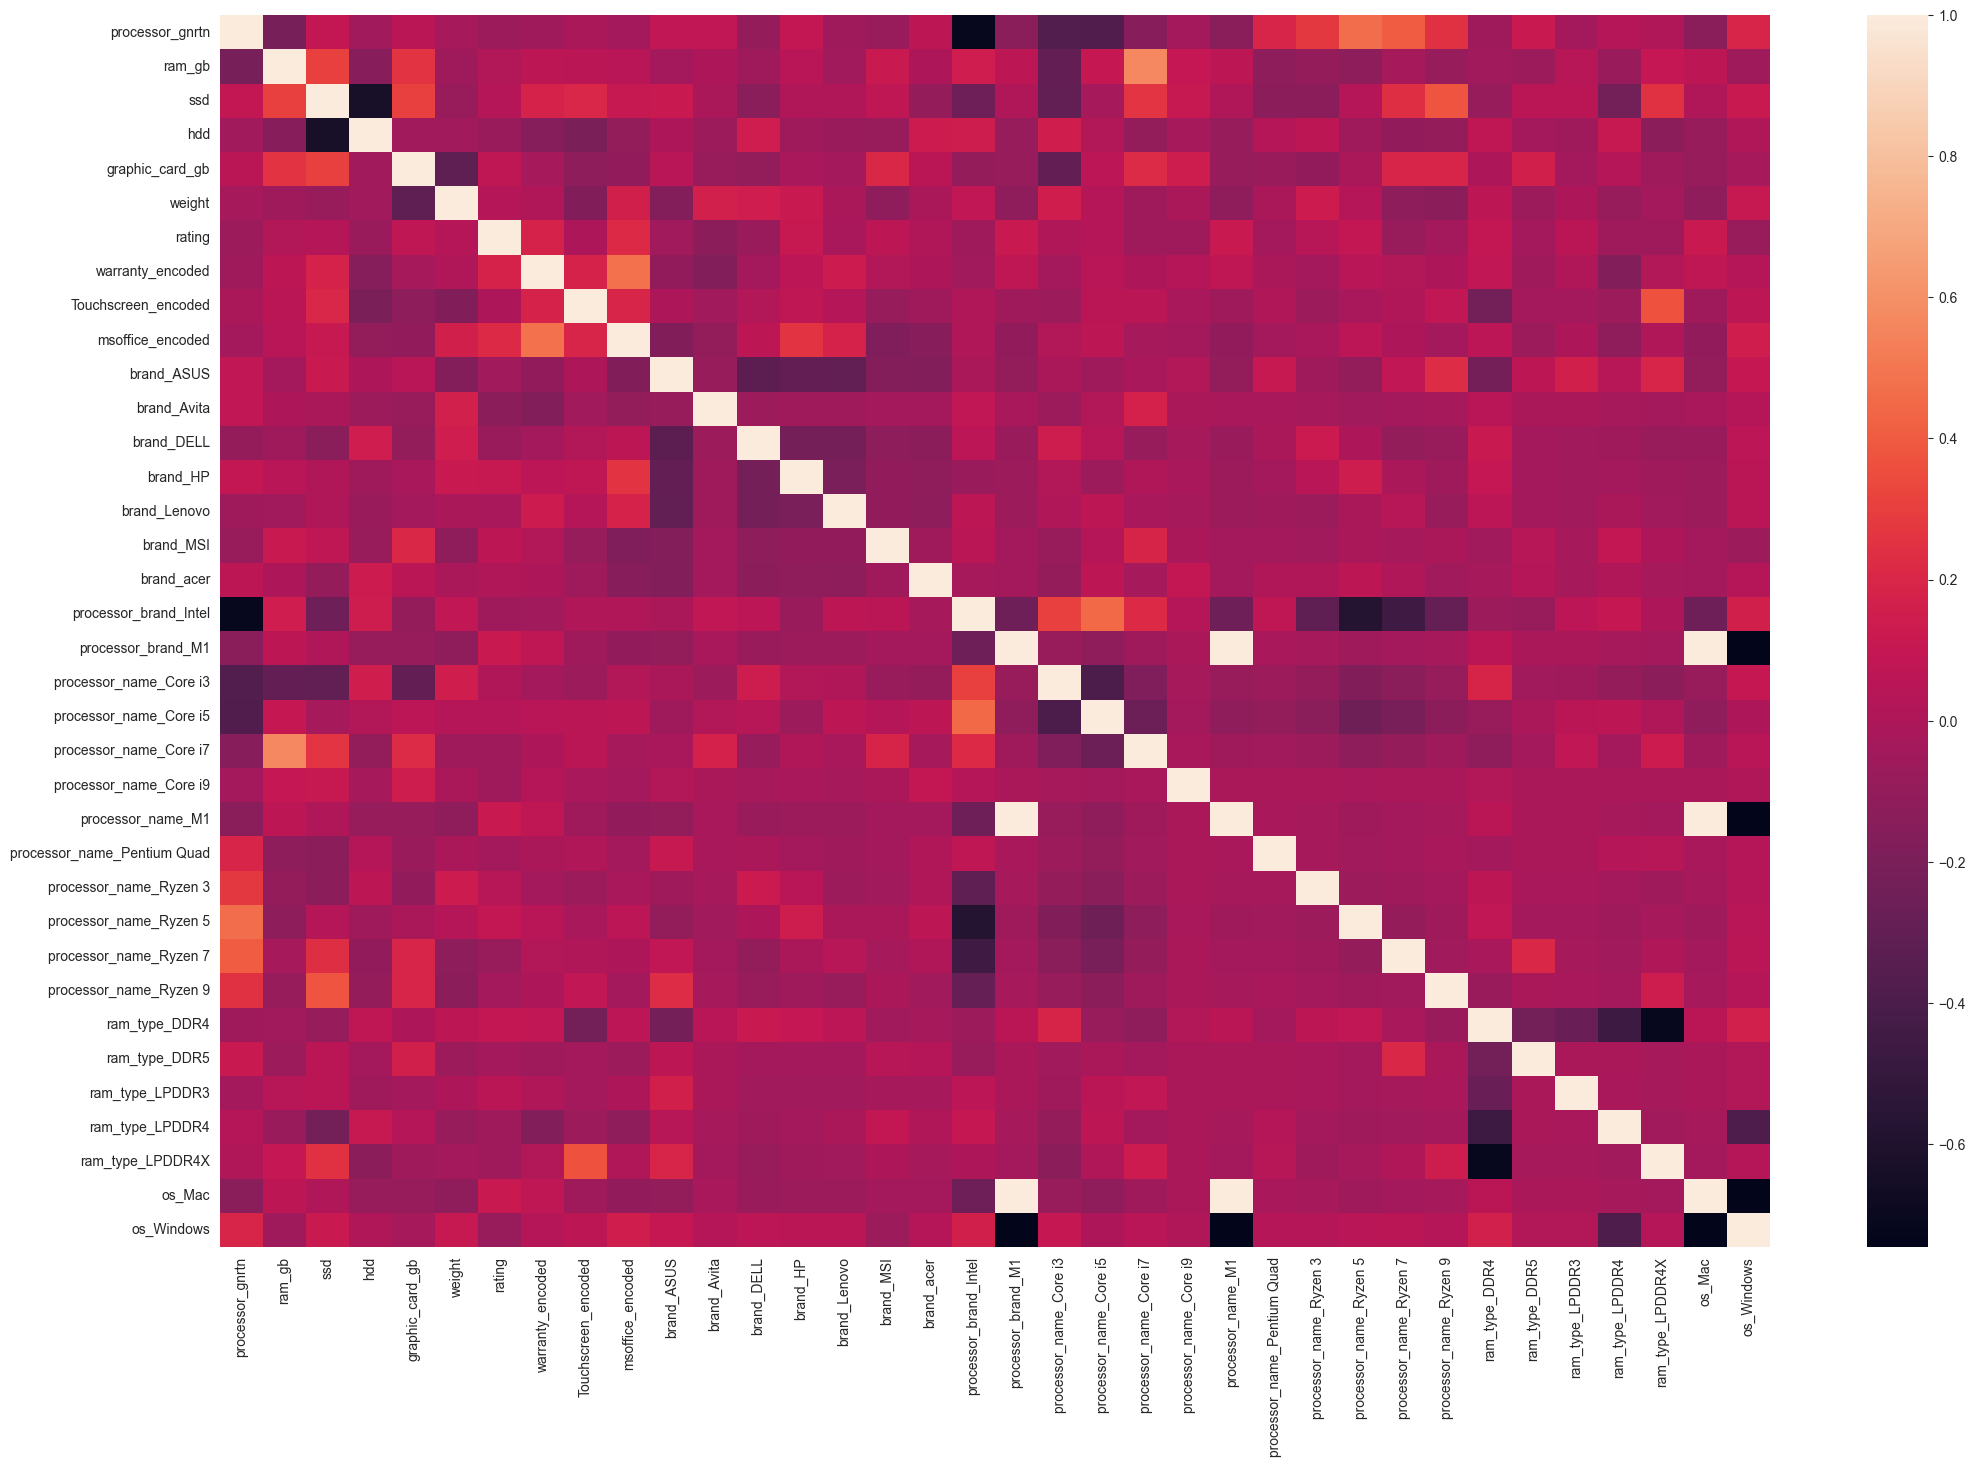

In [58]:
# Multi-colinearity between all feature
plt.figure(figsize = (25,16))
sns.heatmap(x.corr())
plt.show()

dropping highly correleated columns

In [59]:
x=x.drop("processor_brand_M1",axis=1)

In [60]:
x=x.drop("processor_name_M1",axis=1)

Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
for i in df.columns:
    ss=StandardScaler()
    df[i]=ss.fit_transform(df[[i]])

Train Test and Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [65]:
x_train.shape

(618, 34)

In [66]:
y_train.shape

(618,)

In [67]:
x_test.shape

(155, 34)

In [68]:
y_test.shape

(155,)

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8088150407380741, 0.8082909855793494)

In [73]:
y_pred_test_lr = lr.predict(x_test)

Linear Regression Model

In [74]:
from sklearn.metrics import mean_squared_error,r2_score

In [75]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8088150407380741, 0.8082909855793494)

In [76]:
MSE_lr = mean_squared_error(y_test,y_pred_test_lr)
R2_score_lr=r2_score(y_test,y_pred_test_lr)


In [77]:
print("MSE on Linear Regression testing data :",MSE_lr)
print("r2_score on Linear Regression testing data :",R2_score_lr)

MSE on Linear Regression testing data : 0.2332280273735465
r2_score on Linear Regression testing data : 0.8082909855793494


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

for i in range(21,41):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(x_train,y_train)
    train_score_df=dt.score(x_train,y_train)
    test_score_df=dt.score(x_test,y_test)
    print(f"n_estimators: {i}, Train Score: {train_score_df:}, Test Score: {test_score_df: }")



n_estimators: 21, Train Score: 0.9880371011487441, Test Score:  0.5836588106406738
n_estimators: 22, Train Score: 0.9880371011487441, Test Score:  0.5996591782769748
n_estimators: 23, Train Score: 0.9880371011487441, Test Score:  0.6080782595071849
n_estimators: 24, Train Score: 0.9880371011487441, Test Score:  0.6159404914042355
n_estimators: 25, Train Score: 0.9880371011487441, Test Score:  0.6076201805052661
n_estimators: 26, Train Score: 0.9880371011487441, Test Score:  0.5864313087696373
n_estimators: 27, Train Score: 0.9880371011487441, Test Score:  0.5788461923985764
n_estimators: 28, Train Score: 0.9880371011487441, Test Score:  0.6168428414969949
n_estimators: 29, Train Score: 0.9880371011487441, Test Score:  0.6122297585099595
n_estimators: 30, Train Score: 0.9880371011487441, Test Score:  0.6027778036262146
n_estimators: 31, Train Score: 0.9880371011487441, Test Score:  0.5984982275521211
n_estimators: 32, Train Score: 0.9880371011487441, Test Score:  0.6094952151664643
n_es

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

for i in range(21,41):
    rf = RandomForestRegressor(n_estimators=50,max_depth=i)
    rf.fit(x_train,y_train)
    train_score_rf=rf.score(x_train,y_train)
    test_score_rf=rf.score(x_test,y_test)
    print(f"n_estimators: {i}, Train Score: {train_score_rf:}, Test Score: {test_score_rf: }")



n_estimators: 21, Train Score: 0.9630728161907991, Test Score:  0.7970064847816325
n_estimators: 22, Train Score: 0.9619708287065584, Test Score:  0.7905725121754005
n_estimators: 23, Train Score: 0.9626011616974027, Test Score:  0.8008606912461708
n_estimators: 24, Train Score: 0.961912530319458, Test Score:  0.8020561116335919
n_estimators: 25, Train Score: 0.9621427594747358, Test Score:  0.7956206529842833
n_estimators: 26, Train Score: 0.9623940427873661, Test Score:  0.8034048631244463
n_estimators: 27, Train Score: 0.9619240240358691, Test Score:  0.7997323915609275
n_estimators: 28, Train Score: 0.9621307966797326, Test Score:  0.7903457458229359
n_estimators: 29, Train Score: 0.9627170783281652, Test Score:  0.8072595002916345
n_estimators: 30, Train Score: 0.9614546529745455, Test Score:  0.7985077272157922
n_estimators: 31, Train Score: 0.9578406973820482, Test Score:  0.7981557605239288
n_estimators: 32, Train Score: 0.9634481656531317, Test Score:  0.7918558615684806
n_est

# Adaptive Boosting

In [96]:
from sklearn.ensemble import AdaBoostRegressor

for i in range(21,41):
    ada = AdaBoostRegressor(n_estimators=i)
    ada.fit(x_train,y_train)
    train_score_ab=ada.score(x_train,y_train)
    test_score_ab=ada.score(x_test,y_test)
    print(f"n_estimators: {i}, Train Score: {train_score_ab:}, Test Score: {test_score_ab: }")


n_estimators: 21, Train Score: 0.6383257862268461, Test Score:  0.6638357161342929
n_estimators: 22, Train Score: 0.6473213630406007, Test Score:  0.6681312299961268
n_estimators: 23, Train Score: 0.6376468340217587, Test Score:  0.6276894941635207
n_estimators: 24, Train Score: 0.6353372705467374, Test Score:  0.6384515744928723
n_estimators: 25, Train Score: 0.6246659868303817, Test Score:  0.6373784079949447
n_estimators: 26, Train Score: 0.6403234002531778, Test Score:  0.6410059012246543
n_estimators: 27, Train Score: 0.6264388201621863, Test Score:  0.6486411083326624
n_estimators: 28, Train Score: 0.6329220560779782, Test Score:  0.6402892581355771
n_estimators: 29, Train Score: 0.6242511071079251, Test Score:  0.6317107377453117
n_estimators: 30, Train Score: 0.638246564286505, Test Score:  0.6769970259733211
n_estimators: 31, Train Score: 0.6246255379272863, Test Score:  0.6417243322178386
n_estimators: 32, Train Score: 0.6436903516667529, Test Score:  0.6433186610843085
n_est

# Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(21,40):
    gb = GradientBoostingRegressor(n_estimators=i)
    gb.fit(x_train,y_train)
    train_score_gb=gb.score(x_train,y_train)
    test_score_gb=gb.score(x_test,y_test)
    print(f"n_estimators: {i}, Train Score: {train_score_gb:}, Test Score: {test_score_gb: }")



n_estimators: 21, Train Score: 0.7351094587262104, Test Score:  0.7294416060272024
n_estimators: 22, Train Score: 0.7417494730950696, Test Score:  0.733738070354278
n_estimators: 23, Train Score: 0.7492001384800526, Test Score:  0.7378221380742309
n_estimators: 24, Train Score: 0.7579346980906154, Test Score:  0.7548477602464614
n_estimators: 25, Train Score: 0.7636277812879372, Test Score:  0.7619605901874029
n_estimators: 26, Train Score: 0.7714165093175481, Test Score:  0.7640528439783059
n_estimators: 27, Train Score: 0.7782144948890611, Test Score:  0.7735537807796288
n_estimators: 28, Train Score: 0.7845088271302089, Test Score:  0.7765541701106486
n_estimators: 29, Train Score: 0.7881130252760494, Test Score:  0.7784736375664483
n_estimators: 30, Train Score: 0.7925944798839335, Test Score:  0.7866337797114062
n_estimators: 31, Train Score: 0.7997749262308882, Test Score:  0.7879504992286868
n_estimators: 32, Train Score: 0.8037556096520355, Test Score:  0.7828990688558661
n_est

# Etreme Gradient Boosting (XGBoost)

In [94]:
from xgboost import XGBRegressor
for i in range(21,40):
    xgb = XGBRegressor(n_estimators=i)
    xgb.fit(x_train,y_train)
    train_score_xg=xgb.score(x_train,y_train)
    test_score_xg=xgb.score(x_test,y_test)
    print(f"n_estimators: {i}, Train Score: {train_score_xg: }, Test Score: {test_score_xg: }")


n_estimators: 21, Train Score:  0.9544027899033427, Test Score:  0.8296303881280542
n_estimators: 22, Train Score:  0.955263282099583, Test Score:  0.8295023110883402
n_estimators: 23, Train Score:  0.9570581004282221, Test Score:  0.8296683038042912
n_estimators: 24, Train Score:  0.9585548493091282, Test Score:  0.828298629012311
n_estimators: 25, Train Score:  0.9602270159217472, Test Score:  0.8291015577315822
n_estimators: 26, Train Score:  0.9610494231976994, Test Score:  0.8279038069271135
n_estimators: 27, Train Score:  0.9620068603391027, Test Score:  0.8278372534157775
n_estimators: 28, Train Score:  0.9629672514400804, Test Score:  0.8289777579609948
n_estimators: 29, Train Score:  0.9643464394593202, Test Score:  0.8285264114179093
n_estimators: 30, Train Score:  0.9647094982170885, Test Score:  0.828767971316776
n_estimators: 31, Train Score:  0.9654726417330101, Test Score:  0.8288784770099349
n_estimators: 32, Train Score:  0.9658103434960584, Test Score:  0.829471438782

# Support Vector Machine

In [83]:
from sklearn.svm import SVR

In [84]:
svr = SVR(kernel="linear")

In [85]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [86]:
svr.score(x_train,y_train),svr.score(x_test,y_test)

(0.7922567251734225, 0.8213079200569975)

In [87]:
y_predtest_svr = svr.predict(x_test)

In [106]:
MSE_SVR = mean_squared_error(y_test,y_predtest_svr)
R2_score_SVR = r2_score(y_test,y_predtest_svr)
print(MSE_SVR)
print(R2_score_SVR)

0.21739197521998874
0.8213079200569975


### Conclusion:

Most algorithms show overfitting, where the training score is higher than the test score. However, SVM behaves differently, with a higher test score (0.8213) than training (0.7923), indicating potential instability.

Linear Regression is the better choice as it maintains a balanced score (0.8088, 0.8083) ensuring more reliable and accurate predictions.

In [103]:
print("MSE on Linear Regression testing data :",MSE_lr)
print("R2_Score on Linear Regression testing data :",R2_score_lr)

MSE on Linear Regression testing data : 0.2332280273735465
R2_Score on Linear Regression testing data : 0.8082909855793494
